<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.08/bds_aprendizaje_profundo_002_01_Comparando_Batch_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

 # **<font color="DeepPink">Comparando Batch Size</font>**

Ejemplo extraído de https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

In [ ]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

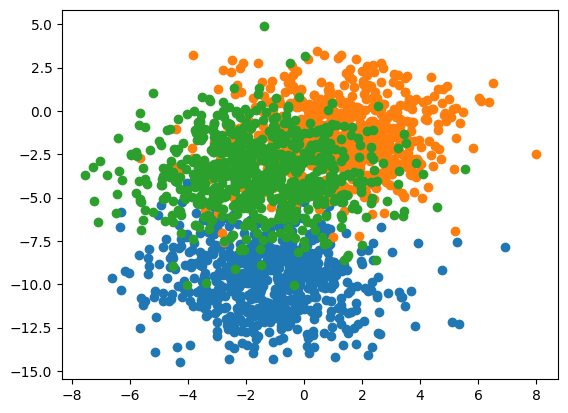

In [ ]:
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=2000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

In [ ]:
X

array([[ -0.55708892,  -5.11801299],
       [  0.81577613,  -2.22645705],
       [  2.89252204,  -2.666182  ],
       ...,
       [ -2.62503025, -12.60673046],
       [  0.39512963,  -9.74484017],
       [  1.270011  ,   0.44922602]])

In [ ]:
y

array([0, 2, 1, ..., 0, 0, 1])

In [ ]:
# one hot encode output variable
y = to_categorical(y)

In [ ]:
y

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
# split into train and test
n_train = 1500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
# define model
# La red será sencilla: tendrá 1 hidden layer con 50 nodos y la output layer con 3 nodos
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# compile model
# Generamos la instancia del modelo. Usamos Stochastic Gradient Descent, pero cuando fijemos el Batch Size, estableceremos
# el tamaño del batch
opt = SGD(learning_rate=0.01, momentum=0.9)
# Usamos la función de pérdida Cross Entropy
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))

In [ ]:
# Se evalúa el modelo, y se imprime el accuracy en el conjunto de entrenamiento y testeo
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.797, Test: 0.828


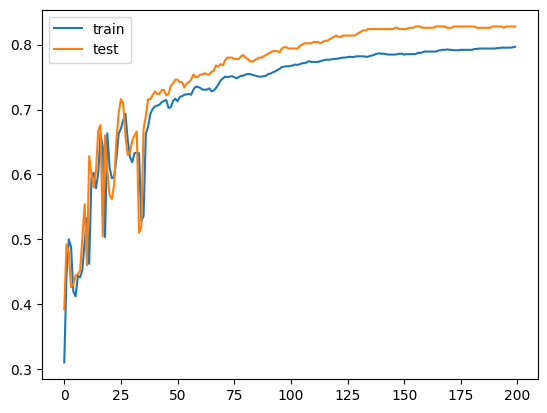

In [ ]:
# Podemos apreciar que a partir de los 100 epochs hay convergencia (escaso cambio en el accuracy)
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Ahora probamos con Stochastic Gradient Descent
# Hacemos el batch size = 1
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)

In [ ]:
# Se evalúa el modelo, y se imprime el accuracy en el conjunto de entrenamiento y testeo
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.632, Test: 0.612


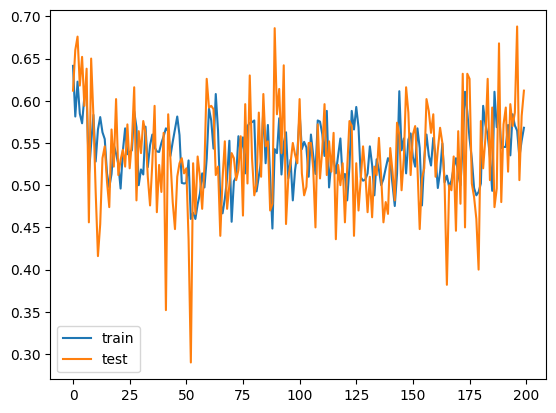

In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Podemos apreciar que hay importantes fluctuaciones en el accuracy. Recordemos que
en el caso de SGD, se actualiza el valor de los parámetros en cada iteración. Por ende, utilizaremos
una learning rate más baja para que el proceso sea más estable.

In [ ]:
# Aplicamos SGD con una menor learning rate
opt2 = SGD(learning_rate=0.001, momentum=0.9)
model2 = Sequential()
model2.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])
history = model2.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)

In [ ]:
# Se evalúa el modelo, y se imprime el accuracy en el conjunto de entrenamiento y testeo
_, train_acc2 = model2.evaluate(trainX, trainy, verbose=0)
_, test_acc2 = model2.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc2, test_acc2))

In [ ]:
# Mejora sustancialmente con la menor learning rate
# Converge en un menor número de epochs
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Por último, entrenamos la red con Minibatch, estableciendo un Batch Size de 32 observaciones

In [ ]:
# Ajustamos el modelo con la learning rate original
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=32)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Por último, testeamos el modelo para diferentes tamaños de batch, y ploteamos resultados


def fit_model(trainX, trainy, testX, testy, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=n_batch)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('batch='+str(n_batch), pad=-40)


# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
pyplot.figure(figsize=[34,28])
for i in range(len(batch_sizes)):
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, testX, testy, batch_sizes[i])
# show learning curves
pyplot.show()

<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---